In [2]:
import numpy as np
import sklearn
from sklearn.svm import SVC
from matplotlib import cm
import matplotlib.pyplot as plt

**Contents**

0. [Data generation](#0-data-generation)  
1. [Linear](#1-Linear)  
2. [Polynomial](#2-polynomial)
3. [Sigmoid](#3-sigmoid)
4. [RBF](#4-rbfradial-basis-function)
5. [Custom kernel](#5-custom-kernel)

# 0. Data generation

We are going to use 50 samples with 2 features.

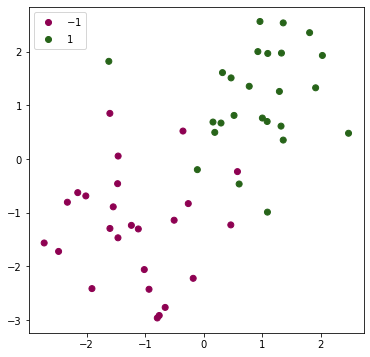

In [6]:
np.random.seed(42)
X = np.r_[np.random.randn(25, 2) - [1, 1], np.random.randn(25, 2) + [1,1]]
Y = np.array([-1] * 25 + [1] * 25)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)

scatter = ax.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=50, cmap=cm.get_cmap("PiYG"),)
ax.legend(*scatter.legend_elements())

# 1. Linear

* Linear kernel is the most basic kernel function, which is just same as normal C-SVM.

* $K(x,x')=x\cdot x'$

* In this case, the only hyperparameter that affects generating a decision boundary is the penalty, $C$. Therefore, we are going to check how it changes with different $C$.

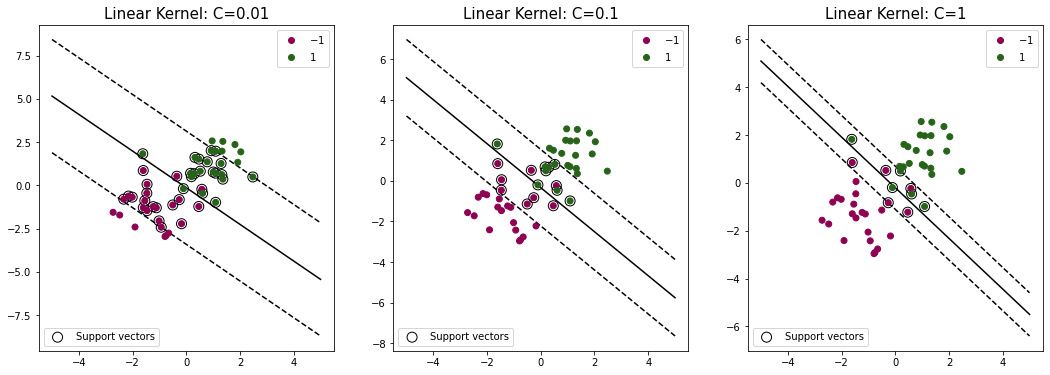

In [11]:
penalties = [0.01, 0.1, 1]
fig = plt.figure(figsize=(18, 6))
fignum = 1
for C in penalties:
    clf = SVC(kernel="linear", C=C)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    ax = fig.add_subplot(1,3,fignum)
    ax.plot(xx, yy, "k-")
    ax.plot(xx, yy_down, "k--")
    ax.plot(xx, yy_up, "k--")

    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        zorder=10,
        edgecolors="black",
        facecolors='none',
        cmap=cm.get_cmap("PiYG"),
        label='Support vectors'
    )
    
    scatter = ax.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=50, cmap=cm.get_cmap("PiYG"),)
    legend2=ax.legend(*scatter.legend_elements())
    ax.add_artist(legend2)
    ax.legend(loc=3)
    ax.set_title(f'Linear Kernel: C={C}',fontsize=15)
    fignum += 1

* It is easy to expect the result that the higher $C$ is, the narrower margins are and the fewer support vectors

* Like its name, it shows a linear decision boundary.

# 2. Polynomial

* Polynomial kernel is a general form of Linear kernel

* $K(x,x')=(\gamma \, x \cdot x' + r)^d$

* Here, we have three hyperparameters except the penalty : $\gamma$, $d$, $r$

* We are going to check how it looks by changing two hyperparmeters $\gamma$ and $d$.

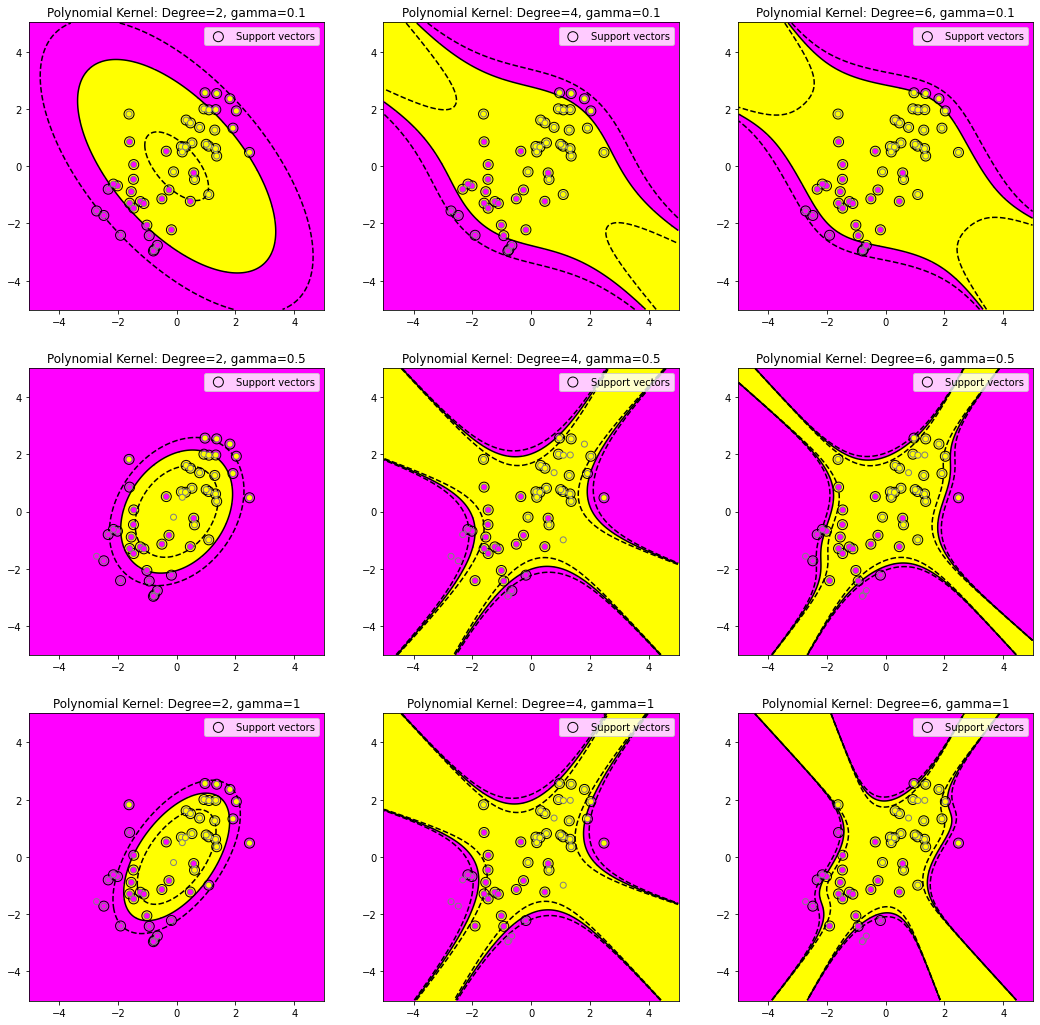

In [7]:
degree = [2,4,6]
gammas = [0.1,0.5,1]
fig = plt.figure(figsize=(18, 18))
fignum = 1
for gamma in gammas:
    for d in degree:
        clf = SVC(kernel='poly',degree=d,gamma=gamma,C=0.5)
        clf.fit(X,Y)
        ax = fig.add_subplot(3,3,fignum)

        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=100,
            facecolors="none",
            zorder=10,
            edgecolors="black",
            label='Support vectors'
        )
        ax.legend()
        ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='gray',cmap=cm.get_cmap("spring"))

        x_min = -5
        x_max = 5
        y_min = -5
        y_max = 5

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        ax.pcolormesh(XX, YY, Z > 0, cmap=cm.get_cmap("spring"))
        ax.contour(
            XX,
            YY,
            Z,
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
            levels=[-0.5, 0, 0.5],
        )

        ax.set_title(f'Polynomial Kernel: Degree={d}, gamma={gamma}')
        fignum = fignum + 1


* We have some interesting results

* When the degree is 2, the decision boundary looks like an oval and it gets smaller with larger $\gamma$.  

* The other two types($d$=4,6) look alike(like blood vessels). But they do not have any obvious patterns related to $\gamma$.  
    But the decision boundary with d=6 is more curvy or wavy.

# 3. Sigmoid

* Sigmoid kernel is also one of the popular kernels. Equations of polynomial and sigmoid kernel are abit similar. But the different thing is sigmoid kernel using $tanh$ to get flexibility.

* $K(x,x')=tanh(\gamma \, x\cdot x'+r)$

* In this case, we would like to see the effects of coefficient $r$ and $\gamma$.

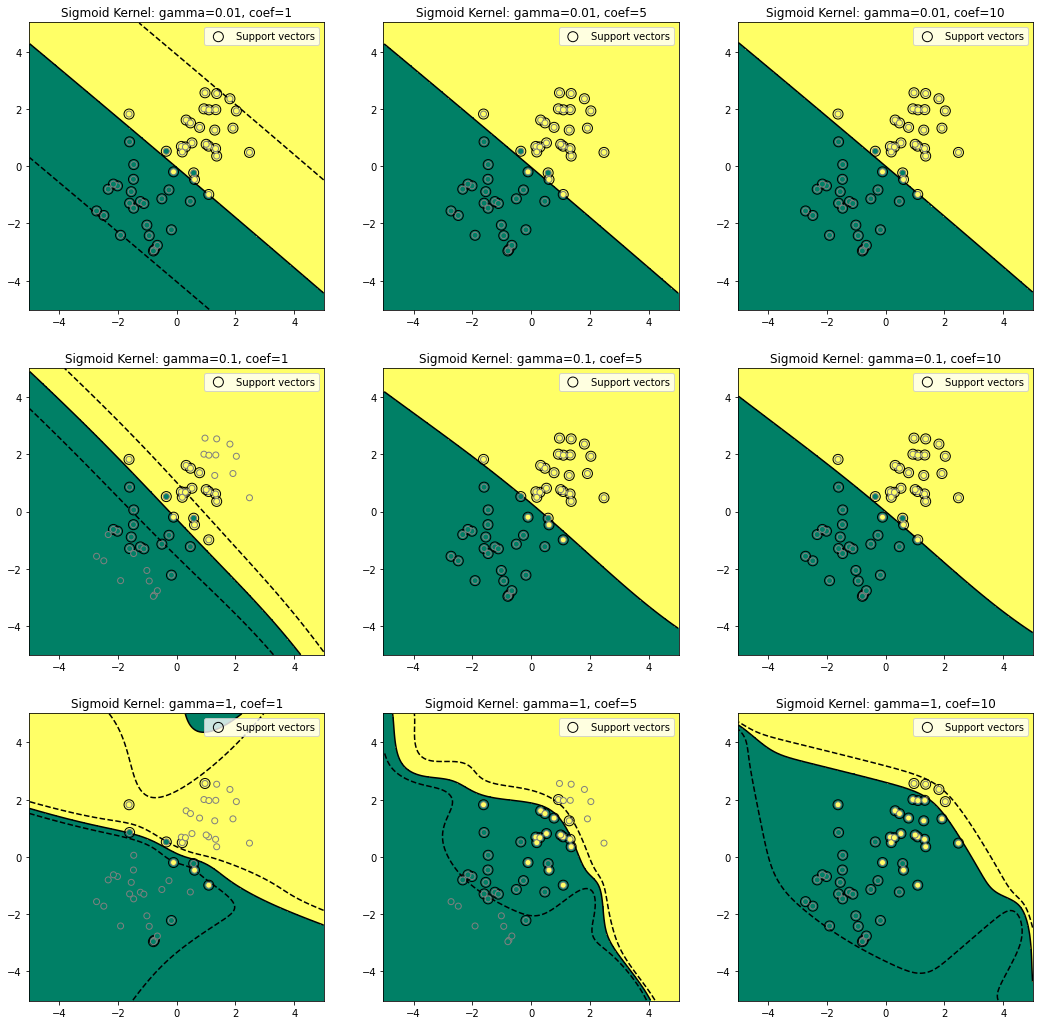

In [19]:
coef0 = [1,5,10]
gammas = [0.01,0.1,1]
fig = plt.figure(figsize=(18, 18))
fignum = 1
for gamma in gammas:
    for coef in coef0:
        clf = SVC(kernel='sigmoid',gamma=gamma,coef0=coef,C=0.5)
        clf.fit(X,Y)
        ax = fig.add_subplot(3,3,fignum)

        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=100,
            facecolors="none",
            zorder=10,
            edgecolors="black",
            label='Support vectors'
        )
        ax.legend()
        ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='gray',cmap=cm.get_cmap("summer"))

        x_min = -5
        x_max = 5
        y_min = -5
        y_max = 5

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        ax.pcolormesh(XX, YY, Z > 0, cmap=cm.get_cmap("summer"))
        ax.contour(
            XX,
            YY,
            Z,
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
            levels=[-0.5, 0, 0.5],
        )

        ax.set_title(f'Sigmoid Kernel: gamma={gamma}, coef={coef}')
        fignum = fignum + 1


* It is hard to say that there is a specific pattern of a decision boundary.

* One thing clear is that if $r$ increases, the number of support vectors also goes up. Sometimes, as shown above, all the data points are support vectors.

# 4. RBF(Radial Basis Function)

* Guassian function is also known as RBF(Radial Basis Fucntion). We all know that it can be a good tip use Gaussian function when there is no information of true distributions.

* $K(x,x')=exp(-\gamma \, x \cdot x' + r)$

* The effect of $\gamma$  in RBF kernel plays an important role among other kernels especially. So we are going to check it right away.

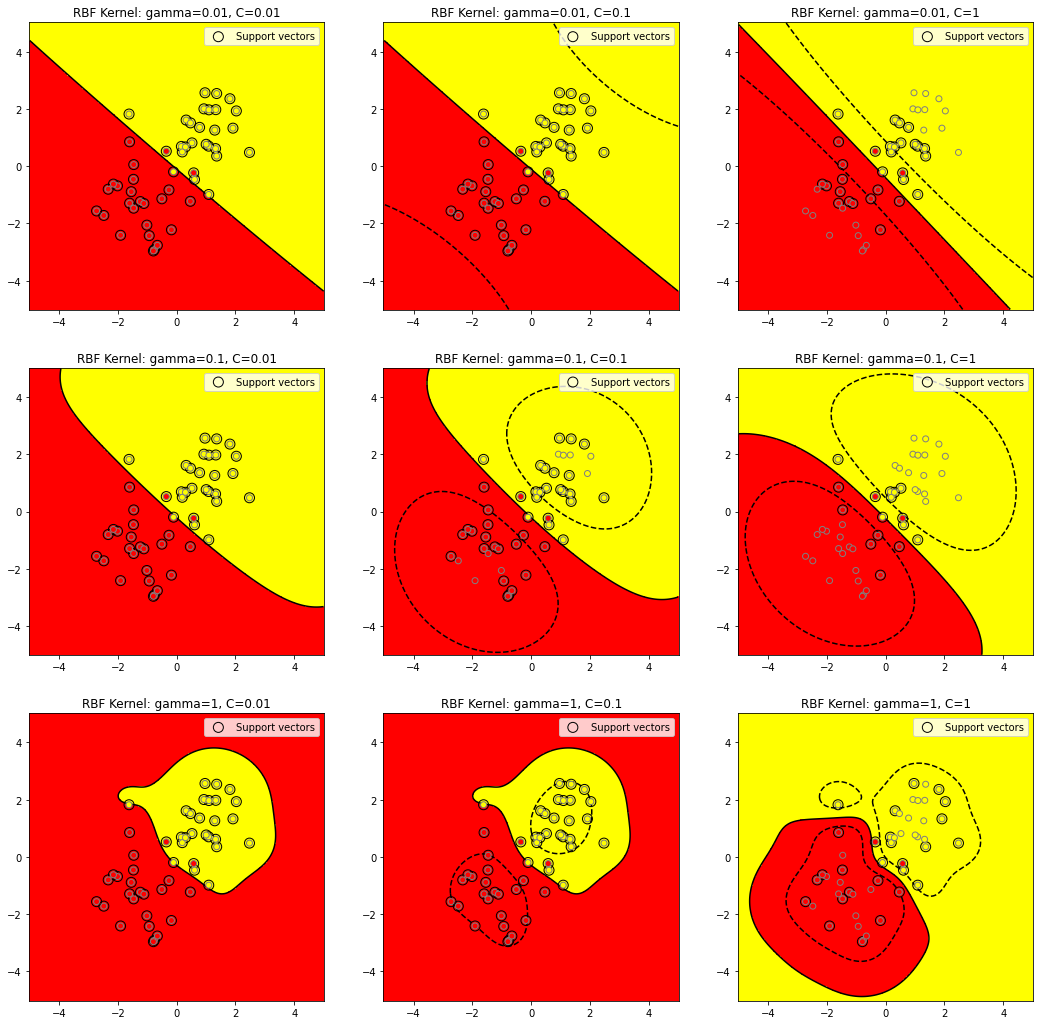

In [25]:
penalties = [0.01,0.1,1]
gammas = [0.01,0.1,1]
fig = plt.figure(figsize=(18, 18))
fignum = 1
for gamma in gammas:
    for C in penalties:
        clf = SVC(kernel='rbf',gamma=gamma,C=C)
        clf.fit(X,Y)
        ax = fig.add_subplot(3,3,fignum)

        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=100,
            facecolors="none",
            zorder=10,
            edgecolors="black",
            label='Support vectors'
        )
        ax.legend()
        ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='gray',cmap=cm.get_cmap("autumn"))

        x_min = -5
        x_max = 5
        y_min = -5
        y_max = 5

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        ax.pcolormesh(XX, YY, Z > 0, cmap=cm.get_cmap("autumn"))
        ax.contour(
            XX,
            YY,
            Z,
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
            levels=[-0.5, 0, 0.5],
        )

        ax.set_title(f'RBF Kernel: gamma={gamma}, C={C}')
        fignum = fignum + 1


* RBF kernel makes a body cell shaped decision boundary.

* As $\gamma$ gets bigger, it tends to make a seperate small round area. 

* At some point, like column 3 in the above figure, the areas(colors) of each class get reversed, which means the dominating color can be changed to the other.

* Higher penalty reuslts in fewer support vectors as well.

# 5. Custom kernel

* So far, we have chekced out the most popular kernel functions with their main hyperparameters. As you know, any functions that meet the conditions on using kernel trick can be a kernel function. Those conditions are metioned as follows.  

    1) $K(x,x')$ is symmetric  

    2) The matrix   

        $\begin{bmatrix}
        K(x_1,x_1) & K(x_1,x_2) & \cdots & K(x_1,x_N) \\
        K(x_2,x_1) & K(x_2,x_2) & \cdots & K(x_2,x_N) \\
        \cdots & \cdots  & \cdots & \cdots \\
        K(x_N,x_1) & K(x_N,x_2) & \cdots & K(x_N,x_N) \\
        \end{bmatrix}$ is positive semi-definite for any $x_1,...,x_N$

* Here are other examples of kernel functions  

    ![Kernels](Kernels.png)

* In this section we are going to check Log function as a custom kernel funtion.

* $K(x,x')=-\gamma \, log(||x-x'||^2+\epsilon)+r$ ($\epsilon$ is for getting a non-zero value inside of Log function)

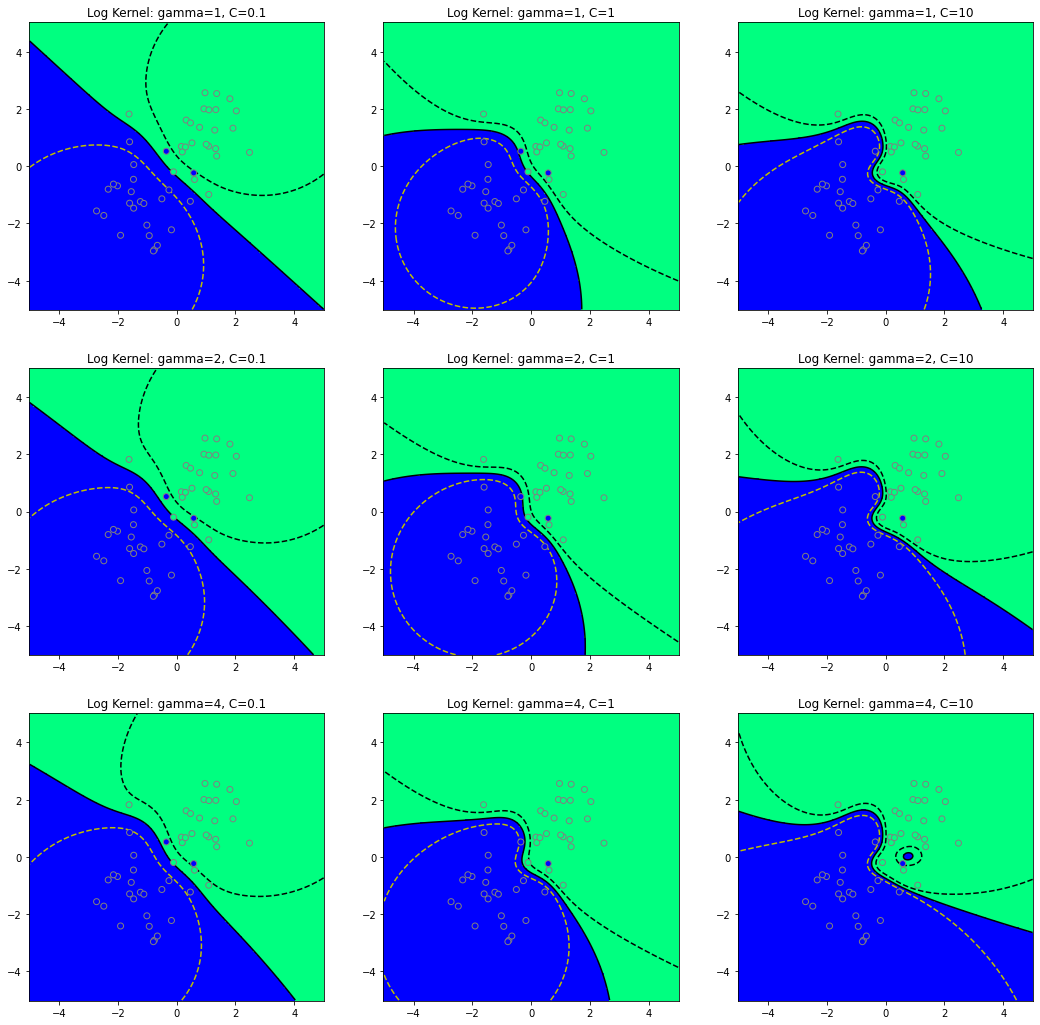

In [31]:
from sklearn.metrics.pairwise import euclidean_distances

penalties = [0.1,1,10]
gammas = [1,2,4]
fig = plt.figure(figsize=(18, 18))
fignum = 1
for gamma in gammas:
    for C in penalties:
        def custom_kernel(X,Y,gamma=gamma):
            """
            Using Log function
            """
            return -gamma * np.log(np.square(euclidean_distances(X,Y))+1) +1

        clf = SVC(kernel=custom_kernel,C=C)
        clf.fit(X,Y)
        ax = fig.add_subplot(3,3,fignum)

        try:
            ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=100,
            facecolors="none",
            zorder=10,
            edgecolors="black",
            label='Support vectors'
            )
            ax.legend()
        
        except:
            None
        
        ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='gray',cmap=cm.get_cmap("winter"))

        x_min = -5
        x_max = 5
        y_min = -5
        y_max = 5

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        ax.pcolormesh(XX, YY, Z > 0, cmap=cm.get_cmap("winter"))
        ax.contour(
            XX,
            YY,
            Z,
            colors=["y", "k", "black"],
            linestyles=["--", "-", "--"],
            levels=[-0.5, 0, 0.5],
        )

        ax.set_title(f'Log Kernel: gamma={gamma}, C={C}')
        fignum = fignum + 1


* It seems that log kernel also works well!

* It makes a curved decision boundary and $C$ affects more than $\gamma$ as you can see.

* However, we can not find any support vectors.(I can't figure it out at this moment.)

# Conclusion

* All the kernel functions have their own characteristics.

* If the data points are distributed like a hyper-shpere, it is better to use RBF kernel. Or a distribution of datasets has no explicit patterns, Sigmoid kernel can be a good option.

* We found that Log kernel is also a good kernel function when a curved decision boundary is needed.

### Authors: Doyoon Kim (doyooni303@korea.ac.kr)